In [ ]:
# for SCC jupyter
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
import pandas as pd
import os
# should test if the number of df rows matches the number of txt rows
# some data files meet the problem:  
# such as twitter-2016train-A, should be 6000 examples, but some lines are read as one line

data_path='./data/'
import os

train_files=[]
test_files=[]
for file in os.listdir(data_path):
    if file.startswith('twitter') and file.endswith('.txt'):
        temp_path=os.path.join(data_path,file)
        if file=='twitter-2016test-A.txt':
            test_files.append(temp_path)
        else:
            train_files.append(temp_path)


In [ ]:
import nltk
nltk.download('punkt')

df_train=None
length_threshold=150 # number of words in a sentence, try to filter out the wrong read lines
for file in train_files:
    df_temp=pd.read_csv(file,sep='\t',names=['id','sentiment','text','none'])
    for idx, text in enumerate(df_temp.text.values):
        tokens = nltk.word_tokenize(text)
        if len(tokens)>length_threshold:
            df_temp.drop(index=[idx])
    df_train=pd.concat([df_train,df_temp])

[nltk_data] Downloading package punkt to
[nltk_data]     /usr4/cs640g/gqiu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# df_train=df_train[df_train.sentiment.isin(['negative','positive'])]
df_train

,id,sentiment,text,none
0,637641175948763136,neutral,@SeeMonterey LOST - Sony cell phone with holid...,NaN
1,637651487762554881,neutral,"@PersonaSoda well yeah, that's third parties. ...",NaN
2,637666734300905472,negative,Sony rewards app is like a lot of 19 y.o femal...,NaN
3,637668142110654468,neutral,@fakethom Have android tab and don't use phone...,NaN
4,637708370129125377,positive,Finally I get my ps4 back I sent it to Sony ca...,NaN
...,...,...,...,...
1961,640916034749263872,positive,I need to become a celebrity so I can just be ...,NaN
1962,641037652414742528,positive,Snoop dogg may be the funniest human alive,NaN
1963,641218824579215360,neutral,I'm only ok with 3rd floor playing Snoop Dogg ...,NaN
1964,641349309439479808,positive,SNOOP DOGG AKA SNOOPADELIC friday friday only ...,NaN


In [ ]:
df_test=None
length_threshold=150 # number of words in a sentence, try to filter out the wrong read lines
for file in test_files:
    df_temp=pd.read_csv(file,sep='\t',names=['id','sentiment','text','none'])
    for idx, text in enumerate(df_temp.text.values):
        tokens = nltk.word_tokenize(text)
        if len(tokens)>length_threshold:
            df_temp.drop(index=[idx])
    df_test=pd.concat([df_test,df_temp])
# df_test=df_test[df_test.sentiment.isin(['negative','positive'])]
df_test
# should be 20633 rows, but get 20632 (?)

,id,sentiment,text,none
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",NaN
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...,NaN
2,619971047195045888,negative,If these runway renovations at the airport pre...,NaN
3,619974445185302528,neutral,If you could ask an onstage interview question...,NaN
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...,NaN
...,...,...,...,...
20627,681877834982232064,neutral,@ShaquilleHoNeal from what I think you're aski...,NaN
20628,681879579129200640,positive,"Iran ranks 1st in liver surgeries, Allah bless...",NaN
20629,681883903259357184,neutral,Hours before he arrived in Saudi Arabia on Tue...,NaN
20630,681904976860327936,negative,@VanityFair Alex Kim Kardashian worth how to ...,NaN


In [ ]:
print(df_train['sentiment'].value_counts())
print(df_test['sentiment'].value_counts())

positive    12740
neutral     12182
negative     4578
Name: sentiment, dtype: int64
neutral     10342
positive     7059
negative     3231
Name: sentiment, dtype: int64


In [ ]:
train_texts=df_train.text.values
train_sentiments=df_train.sentiment.values

In [ ]:
test_texts=df_test.text.values
test_sentiments=df_test.sentiment.values

In [ ]:
sent2labels={'negative':0,'neutral':1, 'positive':2}
train_labels=[sent2labels[x] for x in train_sentiments]

In [ ]:
test_labels=[sent2labels[x] for x in test_sentiments]

In [ ]:
df_train.insert(df_train.shape[1],'label',train_labels)
df_train

,id,sentiment,text,none,label
0,637641175948763136,neutral,@SeeMonterey LOST - Sony cell phone with holid...,NaN,1
1,637651487762554881,neutral,"@PersonaSoda well yeah, that's third parties. ...",NaN,1
2,637666734300905472,negative,Sony rewards app is like a lot of 19 y.o femal...,NaN,0
3,637668142110654468,neutral,@fakethom Have android tab and don't use phone...,NaN,1
4,637708370129125377,positive,Finally I get my ps4 back I sent it to Sony ca...,NaN,2
...,...,...,...,...,...
1961,640916034749263872,positive,I need to become a celebrity so I can just be ...,NaN,2
1962,641037652414742528,positive,Snoop dogg may be the funniest human alive,NaN,2
1963,641218824579215360,neutral,I'm only ok with 3rd floor playing Snoop Dogg ...,NaN,1
1964,641349309439479808,positive,SNOOP DOGG AKA SNOOPADELIC friday friday only ...,NaN,2


In [ ]:
df_test.insert(df_test.shape[1],'label',test_labels)

In [ ]:
# split the train dataset to train and val with 9:1 ratio
from sklearn.model_selection import train_test_split
df_train_split,df_val_split=train_test_split(df_train[['text','label']], test_size=.1)

In [ ]:
from datasets import Dataset,Features,Value,ClassLabel
class_names = ["negative", 'neutral', "positive"]
sentiment_features = Features({'text': Value('string'), 'label': ClassLabel(names=class_names)})

train_dataset=Dataset.from_pandas(df_train_split[['text','label']],features=sentiment_features)
val_dataset=Dataset.from_pandas(df_val_split[['text','label']],features=sentiment_features)

In [ ]:
test_dataset=Dataset.from_pandas(df_test[['text','label']],features=sentiment_features)

In [ ]:
model_names=['prajjwal1/bert-mini','xlnet-large-cased','distilgpt2']
model_index=2
model_name=model_names[model_index]

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name,force_download=True,)

def tokenize_function(examples):
    if model_index==2: # for gpt model
        tokenizer.pad_token = tokenizer.eos_token
    return tokenizer(examples["text"], padding='max_length', truncation=True,max_length=128)

tokenized_train_datasets = train_dataset.map(tokenize_function, batched=True)
tokenized_val_datasets = val_dataset.map(tokenize_function, batched=True)

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

  0%|          | 0/27 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

In [ ]:
tokenized_test_datasets = test_dataset.map(tokenize_function, batched=True)

  0%|          | 0/21 [00:00<?, ?ba/s]

In [ ]:
len(tokenized_train_datasets[0]['input_ids'])

128

In [ ]:
import gc,torch
trainer=None
model=None
model_f=None
trainer_f=None
gc.collect()
torch.cuda.empty_cache()

In [ ]:
from transformers import AutoModelForSequenceClassification

# model init function for hyperparameter search
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3, return_dict=True)
# init the model for train 
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
if model_index==2: # for gpt model
    model.config.pad_token_id = model.config.eos_token_id

loading configuration file https://huggingface.co/distilgpt2/resolve/main/config.json from cache at /usr4/cs640g/gqiu/.cache/huggingface/transformers/f985248d2791fcff97732e4ee263617adec1edb5429a2b8421734c6d14e39bee.422318838d1ec4e061efb4ea29671cb2a044e244dc69229682bebd7cacc81631
Model config GPT2Config {
  "_num_labels": 1,
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 6,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activati

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import TrainingArguments,Trainer


training_args = TrainingArguments(output_dir=model_name+'_3_classes_ckpt',
                                  learning_rate=1e-5,
                                  weight_decay=0.01,
                                  warmup_ratio=0.3,
                                  per_device_train_batch_size=32,
                                  per_device_eval_batch_size=32,
                                  num_train_epochs=5,
                                  evaluation_strategy="epoch",
                                  logging_strategy="epoch",
                                 )
trainer = Trainer(
    model=model, # for train
    # model_init=model_init, # for hyperparas search
    args=training_args,
    train_dataset=tokenized_train_datasets,
    eval_dataset=tokenized_val_datasets,
    compute_metrics=compute_metrics,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using the `WAND_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
## Code use to search to best hyperparameters
# single gpu, use optuna as backend (use pip install optuna)

############## not used now ###############
# def my_hp_space(trial):
#     return {
#         "learning_rate": trial.suggest_float("learning_rate", [5e-5, 3e-5, 2e-5, 2e-4], log=True),
#         "num_train_epochs": trial.suggest_int("num_train_epochs", [1,3, 5]),
#         "seed": trial.suggest_int("seed", 1, 40),
#         "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [4, 8, 16, 32, 64]),
#     }
# trainer.hyperparameter_search(
#     direction="maximize", 
#     backend="optuna", 
#     hp_space=my_hp_space,
# )

In [ ]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: text.
***** Running training *****
  Num examples = 26550
  Num Epochs = 5
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 4150


Epoch,Training Loss,Validation Loss,Accuracy
1,1.540700,0.852703,0.600678
2,0.747400,0.674160,0.706441
3,0.657400,0.674973,0.691864
4,0.625200,0.654133,0.709831
5,0.598900,0.662311,0.704068


Saving model checkpoint to distilgpt2_3_classes_ckpt/checkpoint-500
Configuration saved in distilgpt2_3_classes_ckpt/checkpoint-500/config.json
Model weights saved in distilgpt2_3_classes_ckpt/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 2950
  Batch size = 32
Saving model checkpoint to distilgpt2_3_classes_ckpt/checkpoint-1000
Configuration saved in distilgpt2_3_classes_ckpt/checkpoint-1000/config.json
Model weights saved in distilgpt2_3_classes_ckpt/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to distilgpt2_3_classes_ckpt/checkpoint-1500
Configuration saved in distilgpt2_3_classes_ckpt/checkpoint-1500/config.json
Model weights saved in distilgpt2_3_classes_ckpt/checkpoint-1500/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `GPT2For

TrainOutput(global_step=4150, training_loss=0.833919677734375, metrics={'train_runtime': 604.8602, 'train_samples_per_second': 219.472, 'train_steps_per_second': 6.861, 'total_flos': 4336127852544000.0, 'train_loss': 0.833919677734375, 'epoch': 5.0})

In [ ]:
# trainer.evaluate(tokenized_train_datasets)

In [ ]:
# trainer.evaluate(tokenized_val_datasets)

In [ ]:
trainer.evaluate(tokenized_test_datasets)

The following columns in the evaluation set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 20632
  Batch size = 32


{'eval_loss': 0.7438784241676331,
 'eval_accuracy': 0.6578615742535867,
 'eval_runtime': 29.895,
 'eval_samples_per_second': 690.15,
 'eval_steps_per_second': 21.576,
 'epoch': 5.0}

In [ ]:
trainer.save_model('clean_'+model_name+'_3_classes_model')

Saving model checkpoint to clean_distilgpt2_3_classes_model
Configuration saved in clean_distilgpt2_3_classes_model/config.json
Model weights saved in clean_distilgpt2_3_classes_model/pytorch_model.bin


In [ ]:
# access the training history to plot the loss graph
# his=[]
# for item in trainer.state.log_history:
#     if item['epoch'] in [1.0,2.0,3.0,4.0,5.0, 6.0,7.0,8.0]:
#         his.append(item)
his=trainer.state.log_history
his

[{'loss': 1.5407,
  'learning_rate': 6.666666666666667e-06,
  'epoch': 1.0,
  'step': 830},
 {'eval_loss': 0.8527026176452637,
  'eval_accuracy': 0.6006779661016949,
  'eval_runtime': 4.296,
  'eval_samples_per_second': 686.691,
  'eval_steps_per_second': 21.648,
  'epoch': 1.0,
  'step': 830},
 {'loss': 0.7474,
  'learning_rate': 8.571428571428571e-06,
  'epoch': 2.0,
  'step': 1660},
 {'eval_loss': 0.6741598844528198,
  'eval_accuracy': 0.7064406779661017,
  'eval_runtime': 4.2504,
  'eval_samples_per_second': 694.057,
  'eval_steps_per_second': 21.88,
  'epoch': 2.0,
  'step': 1660},
 {'loss': 0.6574,
  'learning_rate': 5.7142857142857145e-06,
  'epoch': 3.0,
  'step': 2490},
 {'eval_loss': 0.6749733686447144,
  'eval_accuracy': 0.691864406779661,
  'eval_runtime': 4.2619,
  'eval_samples_per_second': 692.173,
  'eval_steps_per_second': 21.821,
  'epoch': 3.0,
  'step': 2490},
 {'loss': 0.6252,
  'learning_rate': 2.8571428571428573e-06,
  'epoch': 4.0,
  'step': 3320},
 {'eval_loss'

In [ ]:
train_losses=[]
val_losses=[]
for i in range(5):
    if i==8:
        train_losses.append(his[2*i+1]['train_loss'])
    else:
        train_losses.append(his[2*i]['loss'])
    val_losses.append(his[2*i+1]['eval_loss'])
print(train_losses,'\n',val_losses)

[1.5407, 0.7474, 0.6574, 0.6252, 0.5989] 
 [0.8527026176452637, 0.6741598844528198, 0.6749733686447144, 0.6541330218315125, 0.6623109579086304]


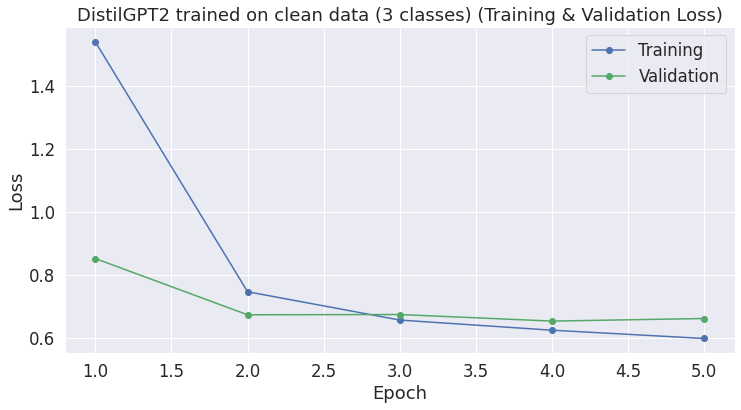

In [ ]:
import matplotlib.pyplot as plt
# % matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot([1, 2, 3, 4,5],train_losses, 'b-o', label="Training")
plt.plot([1, 2, 3, 4,5],val_losses, 'g-o', label="Validation")

# Label the plot.
plt.title("DistilGPT2 trained on clean data (3 classes) (Training & Validation Loss)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
model_f = AutoModelForSequenceClassification.from_pretrained('noisy_'+model_name+'_model', 
                                                             num_labels=3,
                                                             ignore_mismatched_sizes=True,)

loading configuration file noisy_distilgpt2_model/config.json
Model config GPT2Config {
  "_name_or_path": "distilgpt2",
  "_num_labels": 1,
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2ForSequenceClassification"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 6,
  "n_positions": 1024,
  "pad_token_id": 50256,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_sp

In [ ]:
training_args_f = TrainingArguments(output_dir=model_name+'_finetune_3_classes_ckpt',
                                  learning_rate=1e-5,
                                  weight_decay=0.01,
                                  warmup_ratio=0.3,
                                  per_device_train_batch_size=32,
                                  per_device_eval_batch_size=32,
                                  num_train_epochs=5,
                                  evaluation_strategy="epoch",
                                logging_strategy="epoch",
                                 )
trainer_f = Trainer(
    model=model_f, # for train
    # model_init=model_init, # for hyperparas search
    args=training_args_f,
    train_dataset=tokenized_train_datasets,
    eval_dataset=tokenized_val_datasets,
    compute_metrics=compute_metrics,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using the `WAND_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
trainer_f.train()

The following columns in the training set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: text.
***** Running training *****
  Num examples = 26550
  Num Epochs = 5
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 4150


Epoch,Training Loss,Validation Loss,Accuracy
1,1.238500,0.749118,0.656949
2,0.714500,0.649793,0.698983
3,0.635000,0.636973,0.705763
4,0.602000,0.634011,0.710847
5,0.581100,0.634478,0.711186


Saving model checkpoint to distilgpt2_finetune_3_classes_ckpt/checkpoint-500
Configuration saved in distilgpt2_finetune_3_classes_ckpt/checkpoint-500/config.json
Model weights saved in distilgpt2_finetune_3_classes_ckpt/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 2950
  Batch size = 32
Saving model checkpoint to distilgpt2_finetune_3_classes_ckpt/checkpoint-1000
Configuration saved in distilgpt2_finetune_3_classes_ckpt/checkpoint-1000/config.json
Model weights saved in distilgpt2_finetune_3_classes_ckpt/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to distilgpt2_finetune_3_classes_ckpt/checkpoint-1500
Configuration saved in distilgpt2_finetune_3_classes_ckpt/checkpoint-1500/config.json
Model weights saved in distilgpt2_finetune_3_classes_ckpt/checkpoint-1500/pytorch_model.bin
The followi

TrainOutput(global_step=4150, training_loss=0.7542073812829443, metrics={'train_runtime': 595.7817, 'train_samples_per_second': 222.817, 'train_steps_per_second': 6.966, 'total_flos': 4336127852544000.0, 'train_loss': 0.7542073812829443, 'epoch': 5.0})

In [ ]:
trainer_f.evaluate(tokenized_test_datasets)

The following columns in the evaluation set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 20632
  Batch size = 32


{'eval_loss': 0.7144160866737366,
 'eval_accuracy': 0.6713357890655293,
 'eval_runtime': 29.5355,
 'eval_samples_per_second': 698.55,
 'eval_steps_per_second': 21.838,
 'epoch': 5.0}

In [ ]:
# access the training history to plot the loss graph
# his=[]
# for item in trainer_f.state.log_history:
#     if item['epoch'] in [1.0,2.0,3.0,4.0,5.0, 6.0,7.0,8.0]:
#         his.append(item)
his=trainer_f.state.log_history

In [ ]:
train_losses=[]
val_losses=[]
for i in range(5):
    if i==8:
        train_losses.append(his[2*i+1]['train_loss'])
    else:
        train_losses.append(his[2*i]['loss'])
    val_losses.append(his[2*i+1]['eval_loss'])
print(train_losses,'\n',val_losses)

[1.2385, 0.7145, 0.635, 0.602, 0.5811] 
 [0.7491182684898376, 0.6497930884361267, 0.6369725465774536, 0.6340109705924988, 0.6344775557518005]


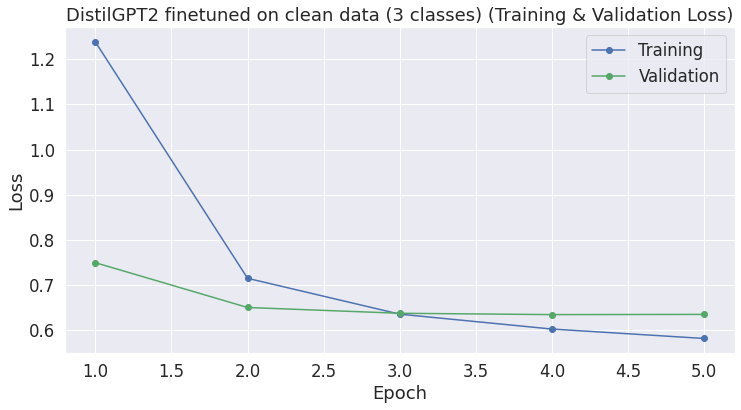

In [ ]:
import matplotlib.pyplot as plt
# % matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot([1, 2, 3, 4,5],train_losses, 'b-o', label="Training")
plt.plot([1, 2, 3, 4,5],val_losses, 'g-o', label="Validation")

# Label the plot.
plt.title("DistilGPT2 finetuned on clean data (3 classes) (Training & Validation Loss)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()